In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

### Complete Dataset

In [3]:
DB2P8 = pd.read_csv("data/DB2P8.csv")
DB5 = pd.read_csv("data/DB5.csv")

DB2P8 = DB2P8[DB5.columns]

# How was this chosen? Is this a form of removing outliers or noise to the new regression?
# Why not simply use the whole DB5?
new_ids = pd.read_csv("data/new_point_ids.csv")

data = pd.read_csv("data/data.csv")
                  
Re_DB5 = pd.read_csv("data/R.csv")#DB5[DB5.id.isin(new_ids.id.values)] #reintroduce dataset

In [4]:
# Getting both DataFrames together

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

R = Re_DB5[["TAUTH"] + coeffs + ["id"]] 

complete_data = pd.concat([DB2, R], axis=0, ignore_index=True)
complete_data

Y = complete_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = complete_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

In [5]:
complete_data[1308:1308 + 5]

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
1308,-3.537705,-1.369241,0.049742,1.301009,0.123986,0.336472,0.012916,-1.203973,0.693147,IP549N
1309,-3.529144,-1.339029,0.050693,1.387793,0.220741,0.336472,0.012916,-1.203973,0.693147,N6T9UP
1310,-2.409169,-0.002904,0.919486,1.962908,1.488400,0.509825,0.464991,-1.206780,0.693147,ZUEQ42
1311,-2.315265,-0.001902,0.919087,1.944337,1.526056,0.508623,0.460584,-1.205377,0.693147,AAI5DZ
1312,-2.547591,-0.002403,0.919087,1.889189,1.832581,0.509825,0.463105,-1.209594,0.693147,0IGSZ3


In [6]:
R

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
0,-2.409169,-0.002904,0.919486,1.962908,1.488400,0.509825,0.464991,-1.206780,0.693147,ZUEQ42
1,-2.315265,-0.001902,0.919087,1.944337,1.526056,0.508623,0.460584,-1.205377,0.693147,AAI5DZ
2,-2.547591,-0.002403,0.919087,1.889189,1.832581,0.509825,0.463105,-1.209594,0.693147,0IGSZ3
3,-2.551175,-0.226399,0.417394,1.844668,1.551809,0.518794,0.497132,-1.236439,0.693147,S4KP99
4,-2.802471,-0.225897,0.416735,1.817427,1.888584,0.520578,0.501987,-1.243978,0.693147,P25P2L
...,...,...,...,...,...,...,...,...,...,...
4937,-4.094745,-1.515037,0.674474,1.593105,-0.486946,-0.189467,0.102557,-1.347185,0.693147,NGC85H
4938,-4.068677,-1.514582,0.668854,1.631004,-0.452871,-0.179605,0.096219,-1.354725,0.693147,ID1IP4
4939,-3.671826,-1.515037,0.668342,1.674664,-0.977634,-0.180324,0.098034,-1.355399,0.693147,K19A5H
4940,-1.753886,-0.020815,1.567574,1.252763,1.631591,0.897719,-0.000300,-1.116746,0.693147,D26CA1


In [7]:
model = sm.OLS(Y,X)
regression = model.fit()

In [8]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:41:57   Log-Likelihood:                 1142.2
No. Observations:                6252   AIC:                            -2266.
Df Residuals:                    6243   BIC:                            -2206.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5185      0.029    -88.250      0.000      -2.574      -2.463
x1             1.1343      0.016     69.351      0.000       1.102       1.166
x2             0.0724      0.014      5.079      0.000       0.044       0.100
x3             0.1749      0.010     18.248      0.000       0.156       0.194
x4            -0.6827      0.007   -100.123      0.000      -0.696      -0.669
x5             1.4479      0.026     56.757      0.000       1.398       1.498
x6             0.2802      0.029      9.731      0.000       0.224       0.337
x7             0.0636      0.037      1.720      0.085      -0.009       0.136
x8             0.2140      0.017     12.541      0.000       0.181       0.247
==============================================================================
Omnibus:                      104.112   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.550
Skew:                          -0.149   Prob(JB):                     9.24e-38
Kurtosis:                       3.753   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
dfbeta_cutoff =  2/(n)**(0.5)

In [10]:
influence = regression.get_influence()
inf_sum = influence.summary_frame()

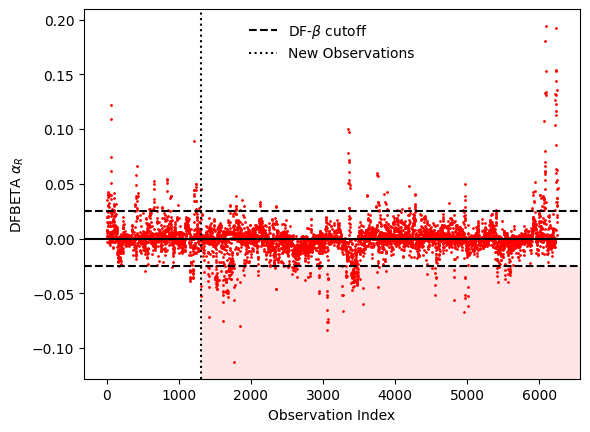

In [11]:
DBβ_αR = inf_sum["dfb_x5"]

plt.scatter(list(range( len(complete_data) )), DBβ_αR.values, s=1, c="r")
plt.axhline(dfbeta_cutoff, c="k", ls="--", label="DF-$\\beta$ cutoff")
plt.axhline(-dfbeta_cutoff, c="k", ls="--")
plt.axhline(0, c="k")
plt.axvline( complete_data[len(DB2P8):].iloc[0].name, c="k", ls=":", label="New Observations")
plt.xlabel("Observation Index")
plt.ylabel("DFBETA $\\alpha_R$")
plt.legend(loc="upper center", frameon=False)


left, bottom, width, height = (complete_data[len(DB2P8):].iloc[0].name, 
                               -dfbeta_cutoff, 
                               len(complete_data), 
                               min(DBβ_αR.values)
                              )
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect);

Around %80 of the complete dataset, is composed by `R`

### Influential Points

High Residual and High Leverage

In [12]:
student_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cutoff_leverage = ((2*p)+2)/n
cutoff_student_resid = 1

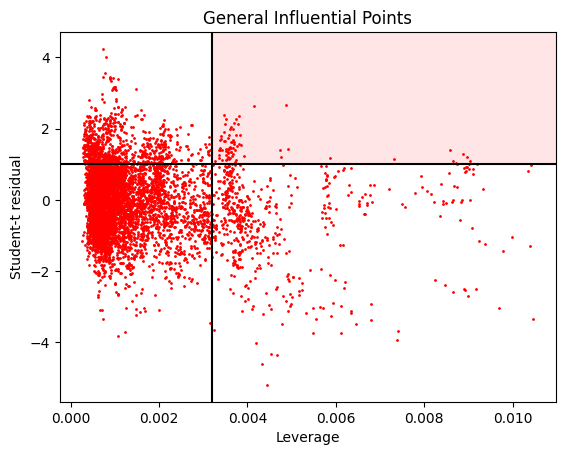

In [13]:
plt.scatter(leverage, student_resid, s=1, c="r")
plt.ylabel("Student-t residual")
plt.xlabel("Leverage")
plt.axvline(cutoff_leverage, c="k")
plt.axhline(cutoff_student_resid, c="k")

left, bottom, width, height = cutoff_leverage, cutoff_student_resid, max(leverage), max(student_resid)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)
plt.title("General Influential Points");

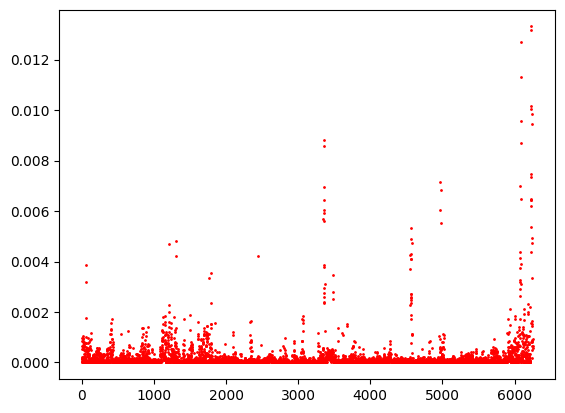

In [14]:
plt.scatter(list(range(len(complete_data))),inf_sum["cooks_d"], s=1, c="r");

In [15]:
from yellowbrick.regressor import CooksDistance


y = complete_data[["TAUTH"]].values
x = complete_data[coeffs].values


#Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(x,y)
visualizer.show();

ValueError: shapes (6252,1) and (6252,1) not aligned: 1 (dim 1) != 6252 (dim 0)